In [138]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from scipy.spatial import distance

# **Problem Statement**

* Prepare a model for animals classification using KNN

# **Dataset - Zoo**
---
---

* This dataset consists of 101 animals from a zoo. There are 16 variables with various traits to describe the animals. The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

* The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables. It is the perfect dataset for those who are new to learning Machine Learning.

In [139]:
df = pd.read_csv("/content/Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# **Dataset Information**
>  zoo - dataset

> Attribute Information: (name of attribute and type of value domain)

1. animal_name: Unique for each instance
2. hair Boolean
3. feathers Boolean
4. eggs Boolean
5. milk Boolean
6. airborne Boolean
7. aquatic Boolean
8. predator Boolean
9. toothed Boolean
10. backbone Boolean
11. breathes Boolean
12. venomous Boolean
13. fins Boolean
14. legs Numeric (set of values: {0,2,4,5,6,8})
15. tail Boolean
16. domestic Boolean
17. catsize Boolean
18. class_type Numeric (integer values in range [1,7])



# **EDA**

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [141]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [142]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [143]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [144]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 1 categorical variables

The categorical variables are :
 ['animal name']


There are 17 Numeric variables

The Numeric variables are :
 ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


In [145]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

animal name 
 frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64
hair 
 0    58
1    43
Name: hair, dtype: int64
feathers 
 0    81
1    20
Name: feathers, dtype: int64
eggs 
 1    59
0    42
Name: eggs, dtype: int64
milk 
 0    60
1    41
Name: milk, dtype: int64
airborne 
 0    77
1    24
Name: airborne, dtype: int64
aquatic 
 0    65
1    36
Name: aquatic, dtype: int64
predator 
 1    56
0    45
Name: predator, dtype: int64
toothed 
 1    61
0    40
Name: toothed, dtype: int64
backbone 
 1    83
0    18
Name: backbone, dtype: int64
breathes 
 1    80
0    21
Name: breathes, dtype: int64
venomous 
 0    93
1     8
Name: venomous, dtype: int64
fins 
 0    84
1    17
Name: fins, dtype: int64
legs 
 4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
tail 
 1    75
0    26
Name: tail, dtype: int64
domestic 
 0    88
1   

In [146]:
for col in df:
    print(f'{col}:\n {df[col].unique()}')

animal name:
 ['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']
hair:
 [1 0]
feathers:
 [0 1]
eggs:
 [0 1]
milk:
 [1 0]
airborne:
 [0 1]
aquatic:
 [0

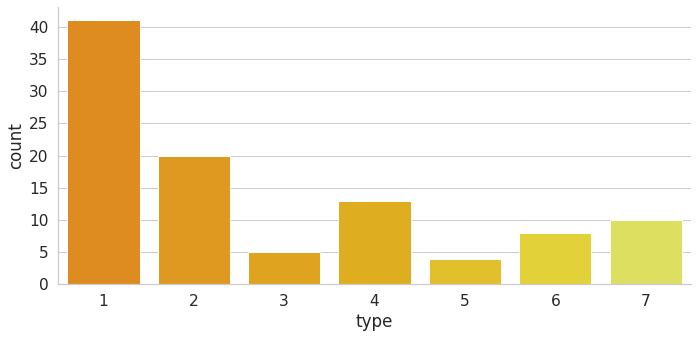

In [147]:
sns.set(style = 'whitegrid', font_scale = 1.4)
sns.catplot('type', data=df, kind="count",height = 5,aspect = 2, palette="Wistia_r")
plt.show()



 Count Plot for hair



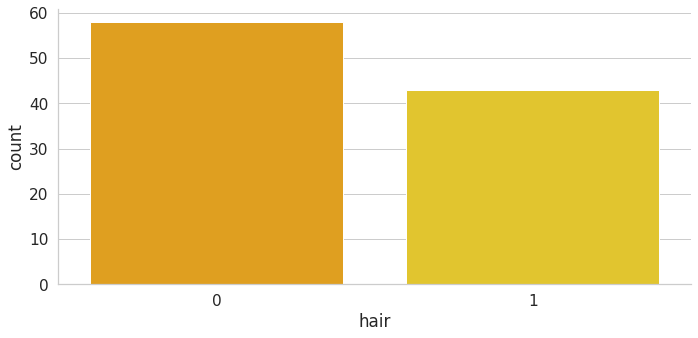



 Count Plot for feathers



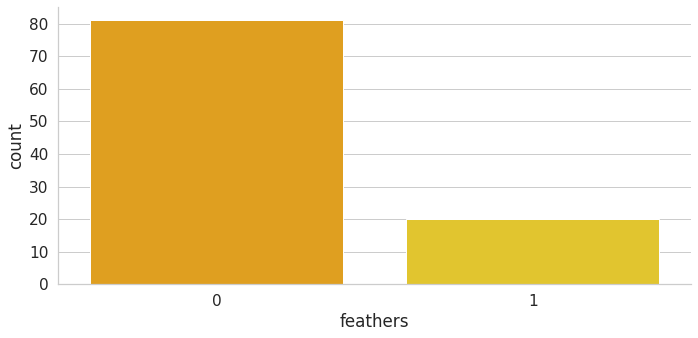



 Count Plot for eggs



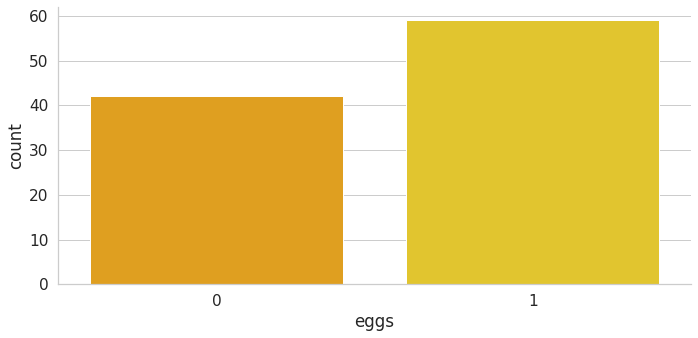



 Count Plot for milk



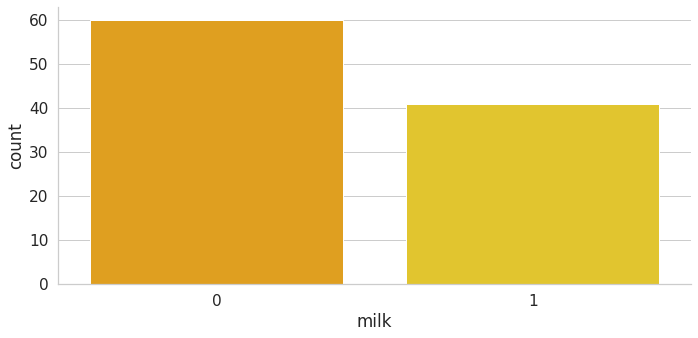



 Count Plot for airborne



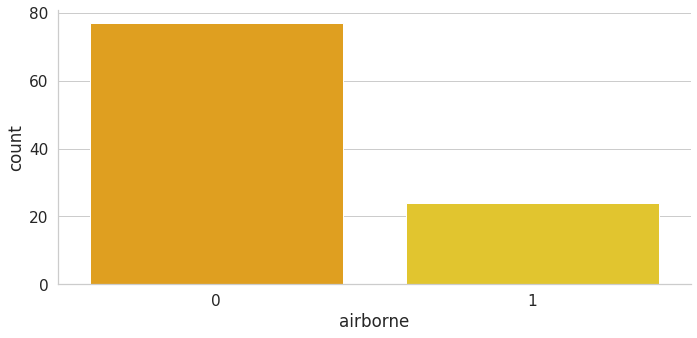



 Count Plot for aquatic



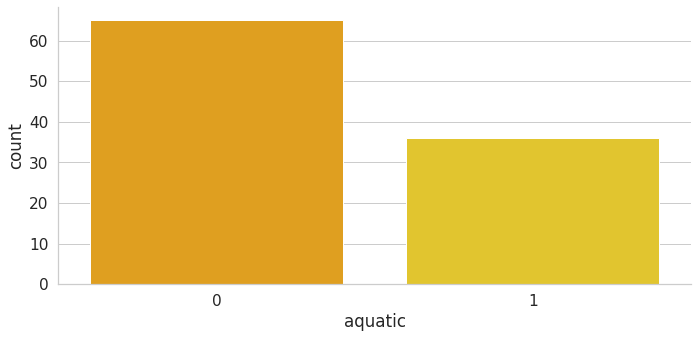



 Count Plot for predator



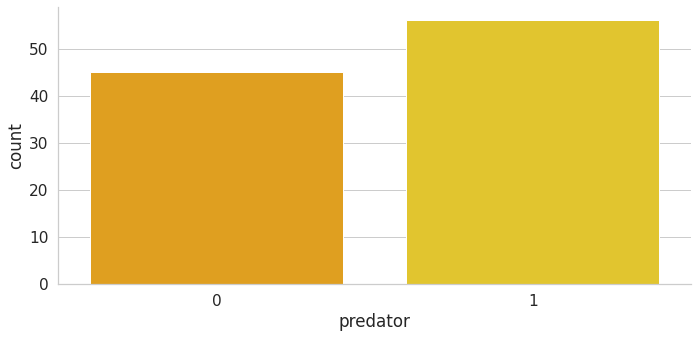



 Count Plot for toothed



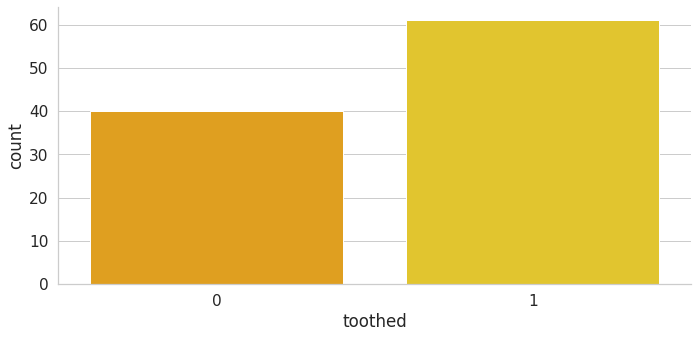



 Count Plot for backbone



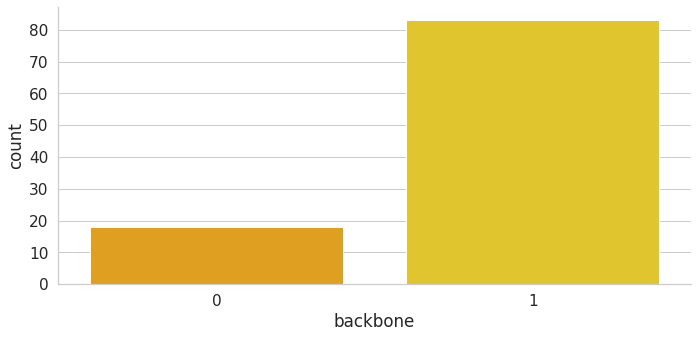



 Count Plot for breathes



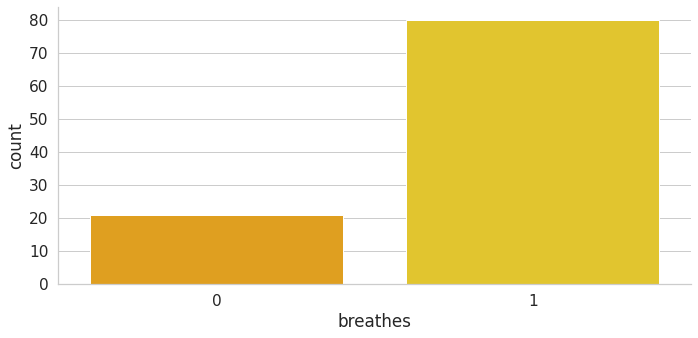



 Count Plot for venomous



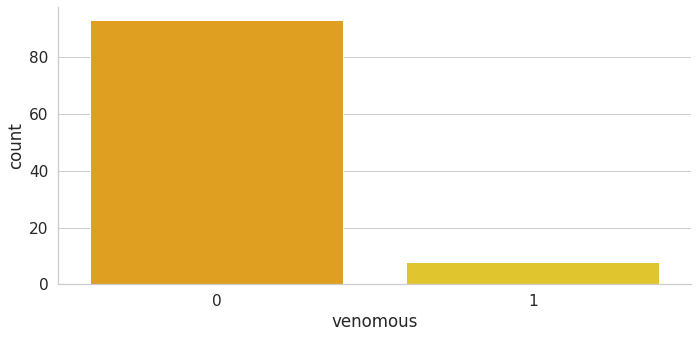



 Count Plot for fins



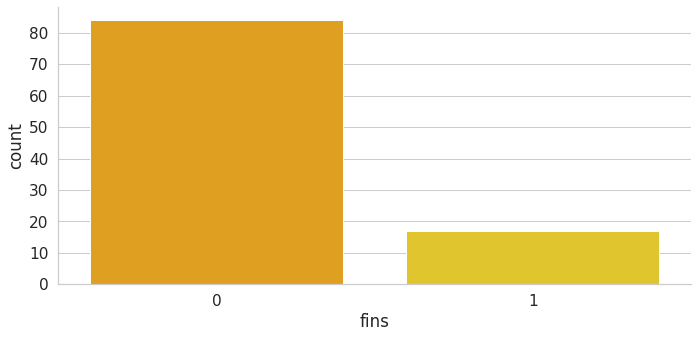



 Count Plot for legs



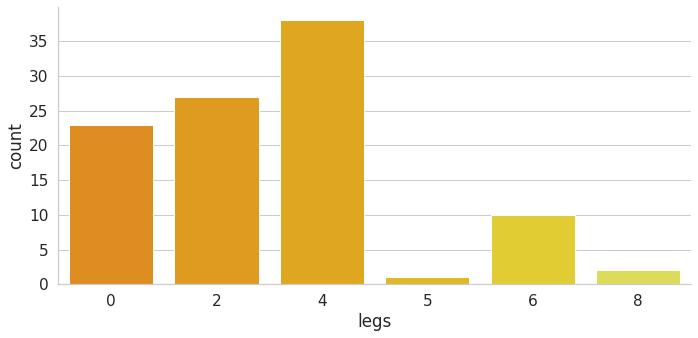



 Count Plot for tail



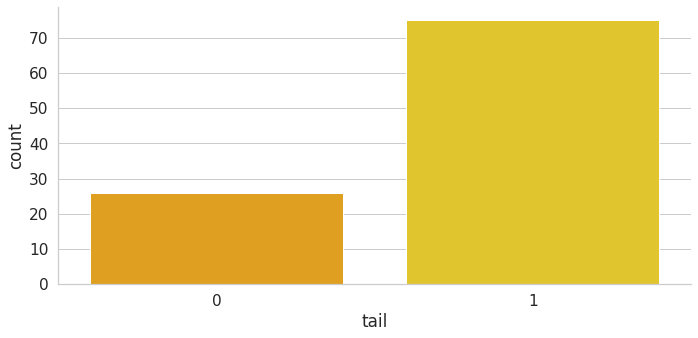



 Count Plot for domestic



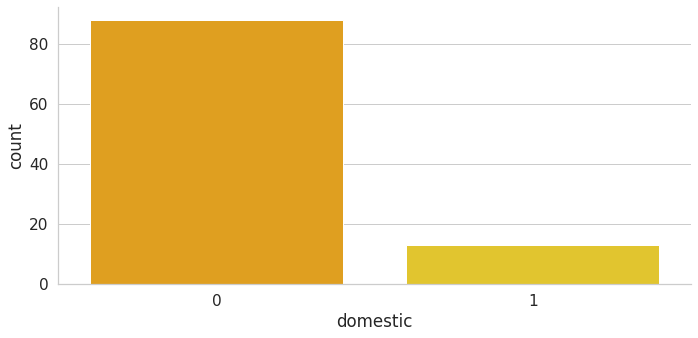



 Count Plot for catsize



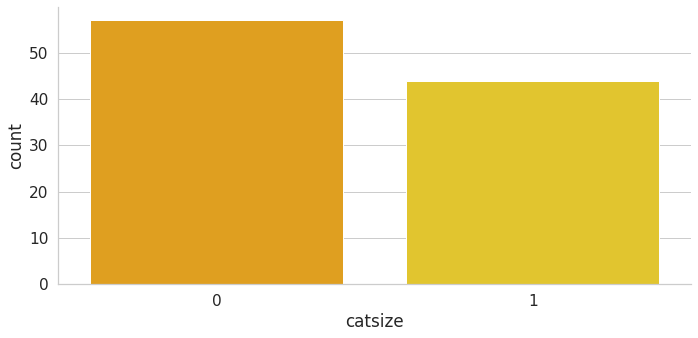



 Count Plot for type



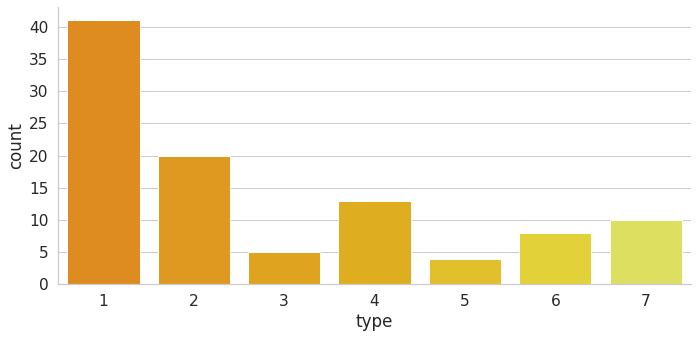

In [148]:
#sns.set(style = 'whitegrid', font_scale = 1.4)
for i in df.iloc[:,1:]:
  print(f"\n\n Count Plot for {i}\n")
  sns.catplot(i, data=df, kind="count",height = 5,aspect = 2, palette="Wistia_r")
  plt.show()
 

<Figure size 432x288 with 0 Axes>

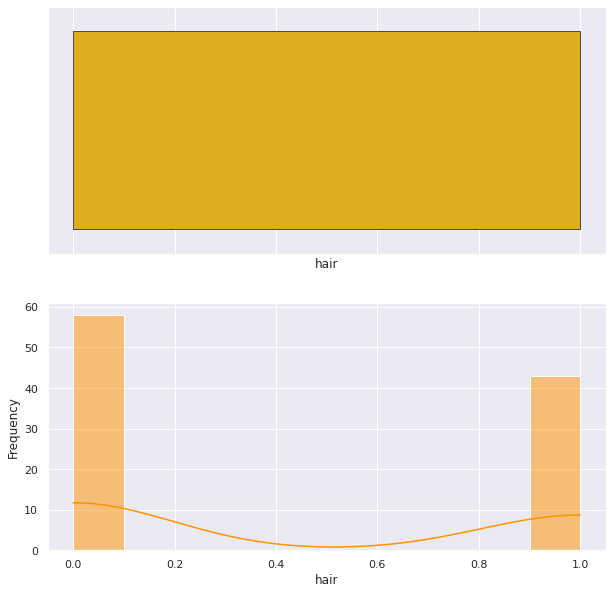

<Figure size 720x720 with 0 Axes>

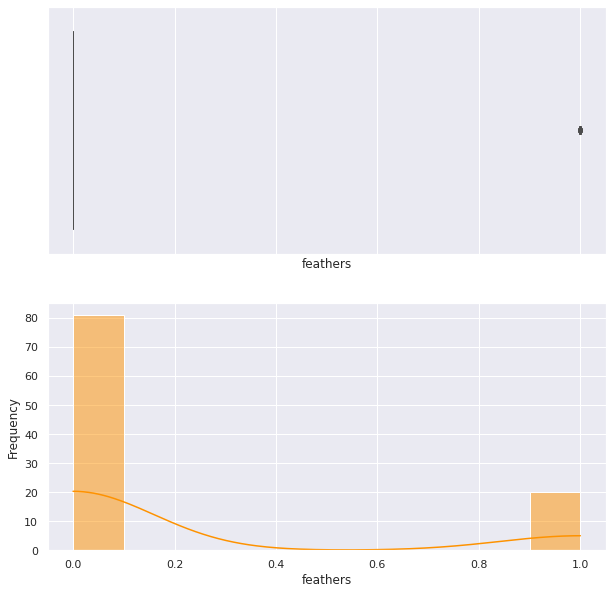

<Figure size 720x720 with 0 Axes>

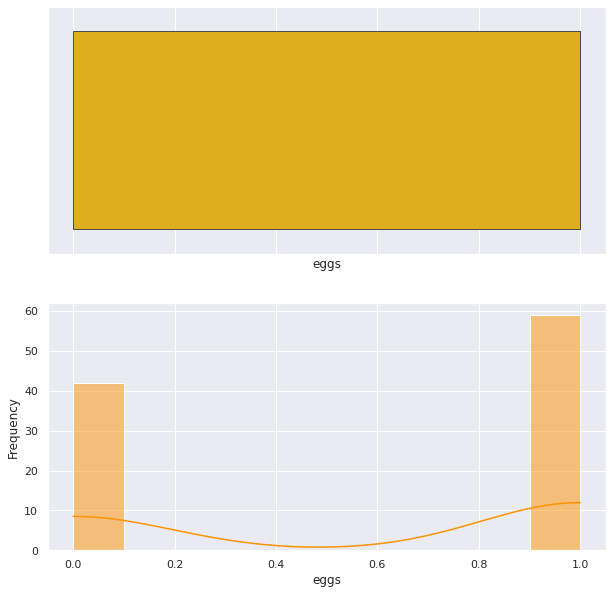

<Figure size 720x720 with 0 Axes>

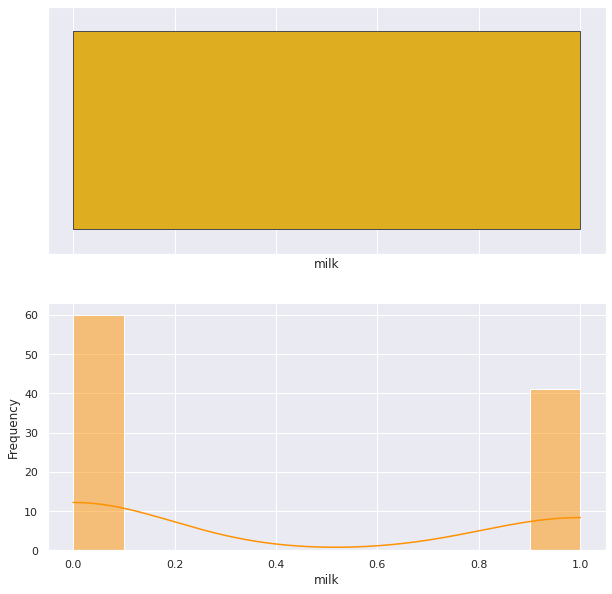

<Figure size 720x720 with 0 Axes>

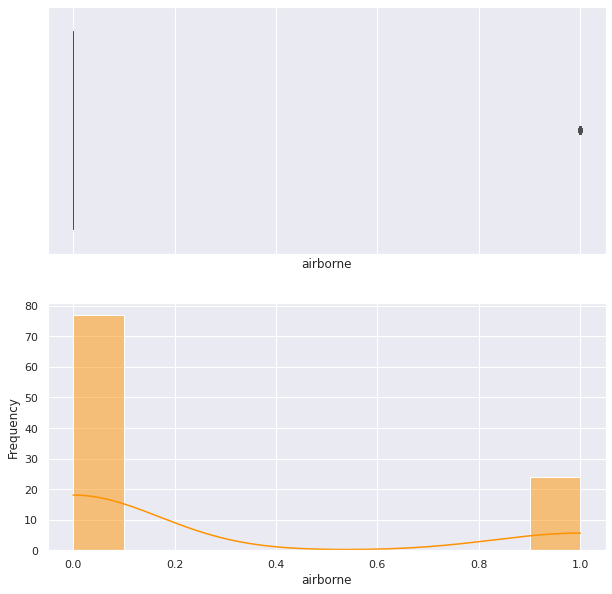

<Figure size 720x720 with 0 Axes>

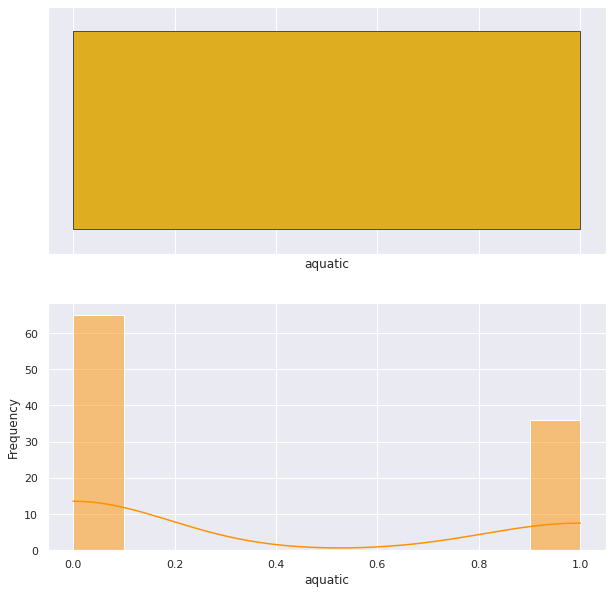

<Figure size 720x720 with 0 Axes>

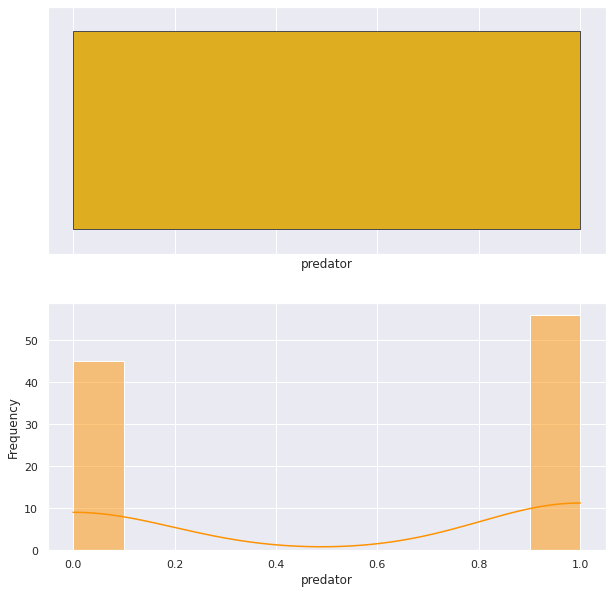

<Figure size 720x720 with 0 Axes>

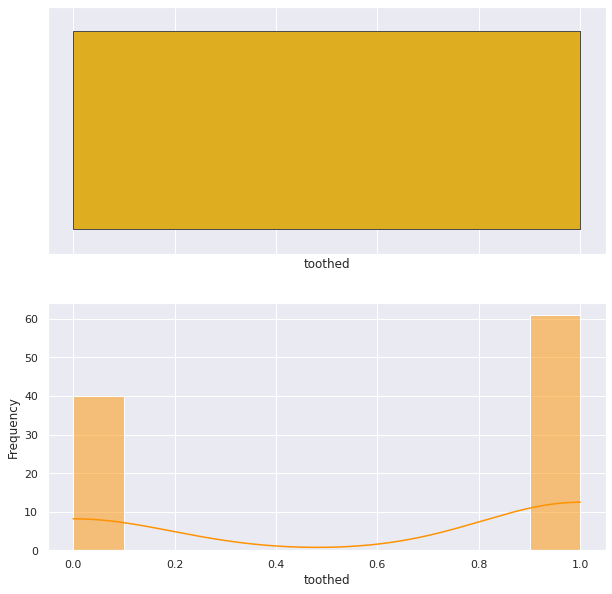

<Figure size 720x720 with 0 Axes>

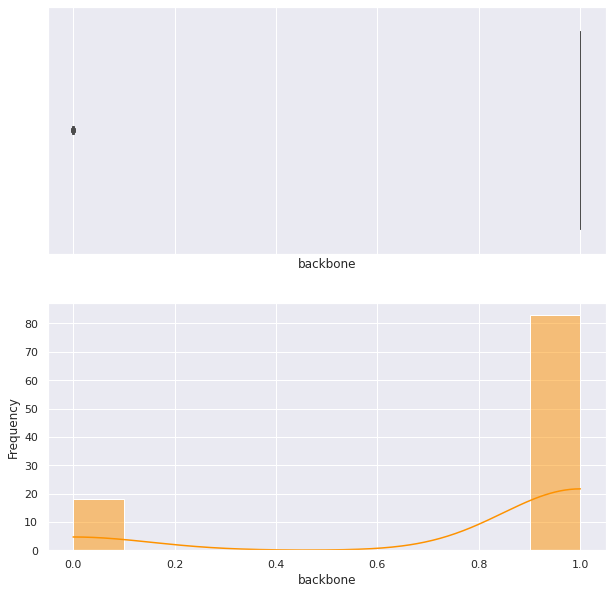

<Figure size 720x720 with 0 Axes>

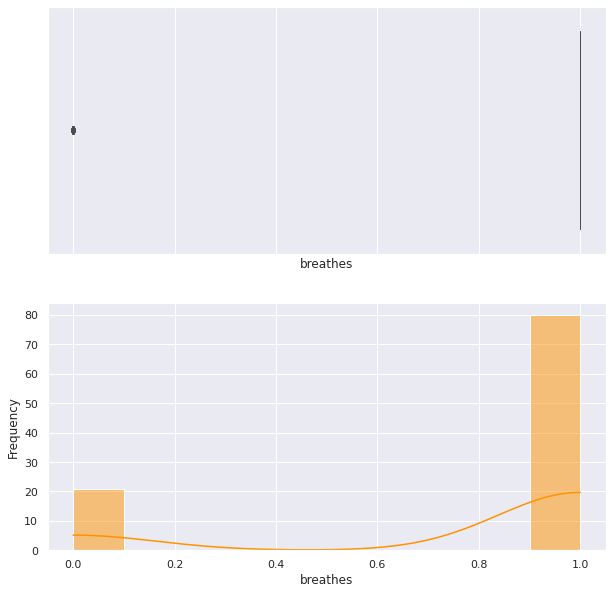

<Figure size 720x720 with 0 Axes>

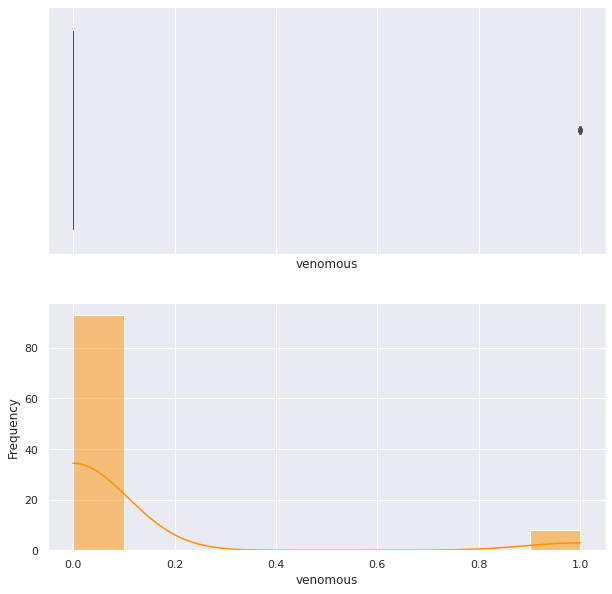

<Figure size 720x720 with 0 Axes>

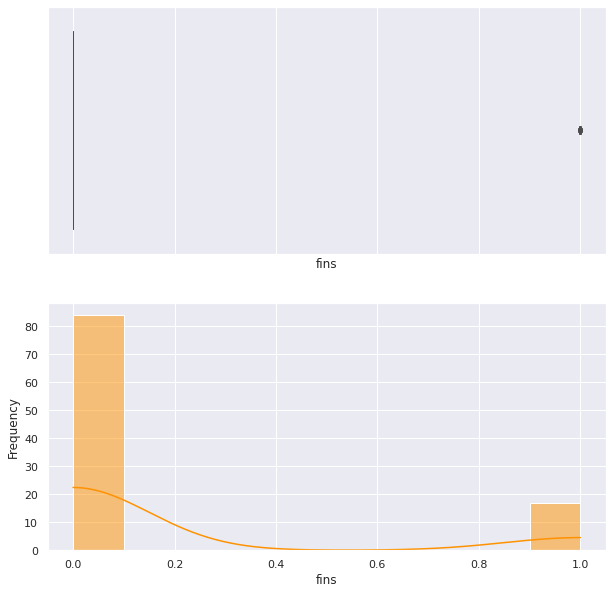

<Figure size 720x720 with 0 Axes>

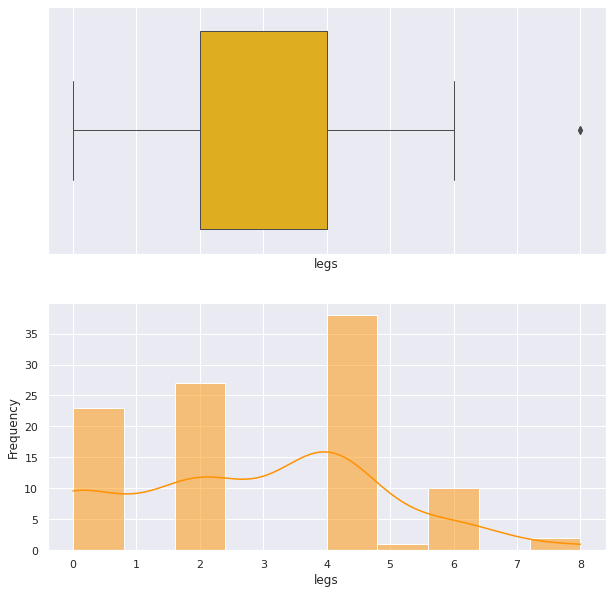

<Figure size 720x720 with 0 Axes>

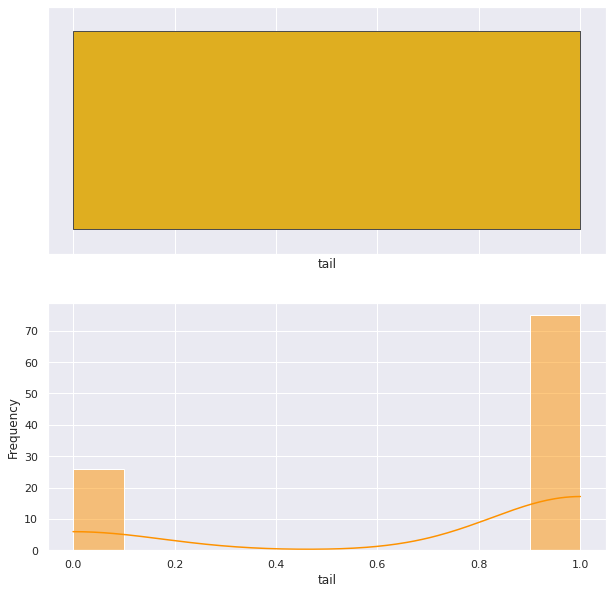

<Figure size 720x720 with 0 Axes>

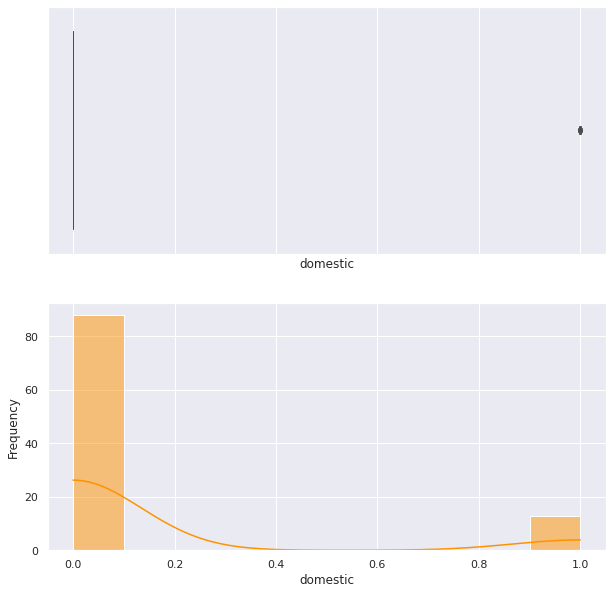

<Figure size 720x720 with 0 Axes>

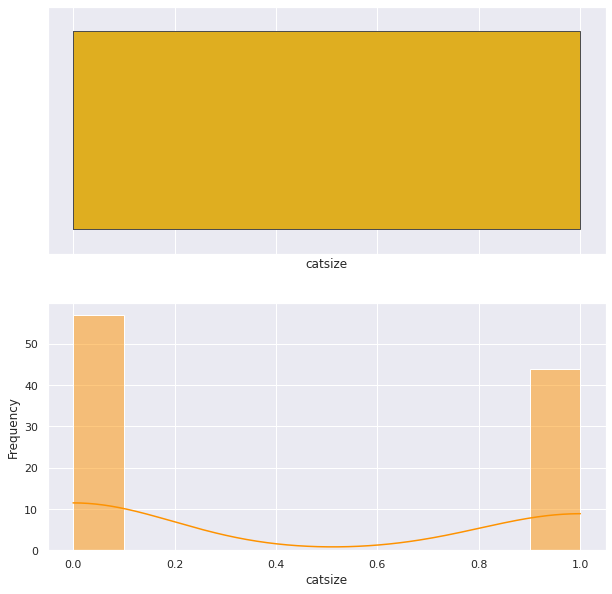

<Figure size 720x720 with 0 Axes>

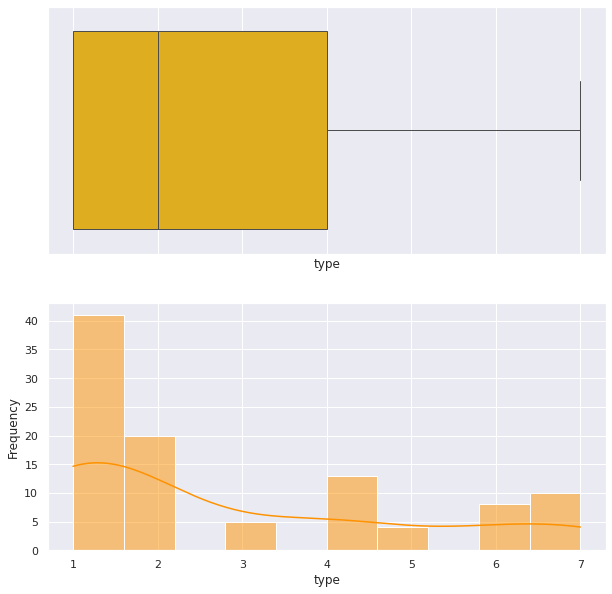

In [149]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="Wistia_r")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="Wistia_r")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="Wistia_r")

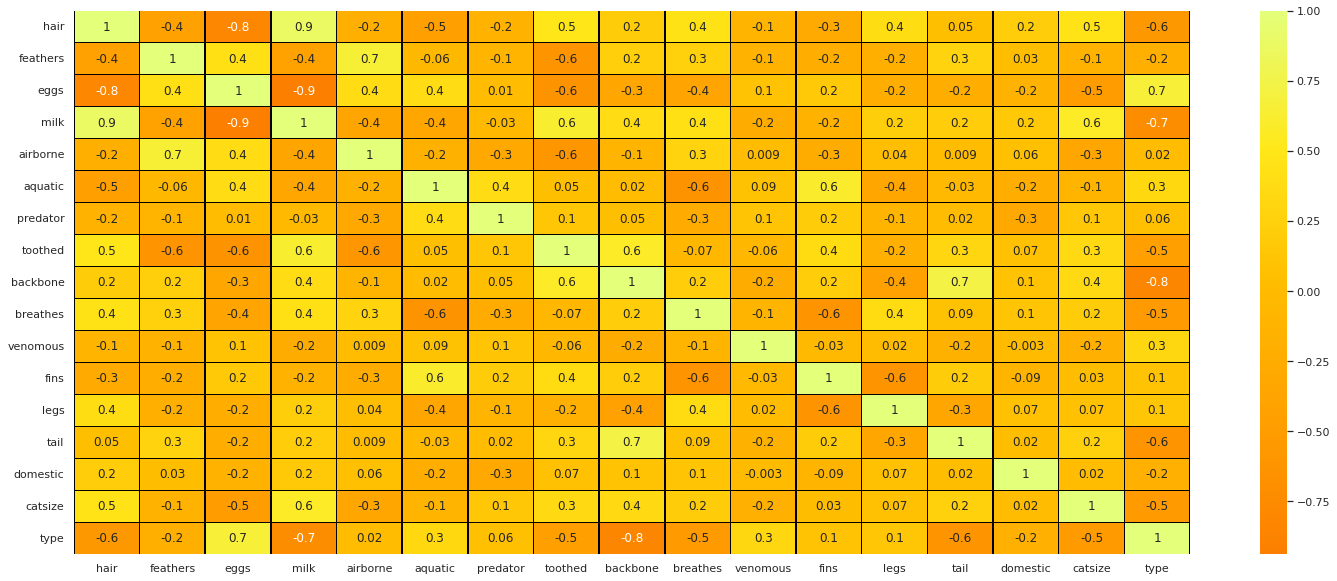

In [150]:
plt.figure(figsize=(25,10))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="Wistia_r", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

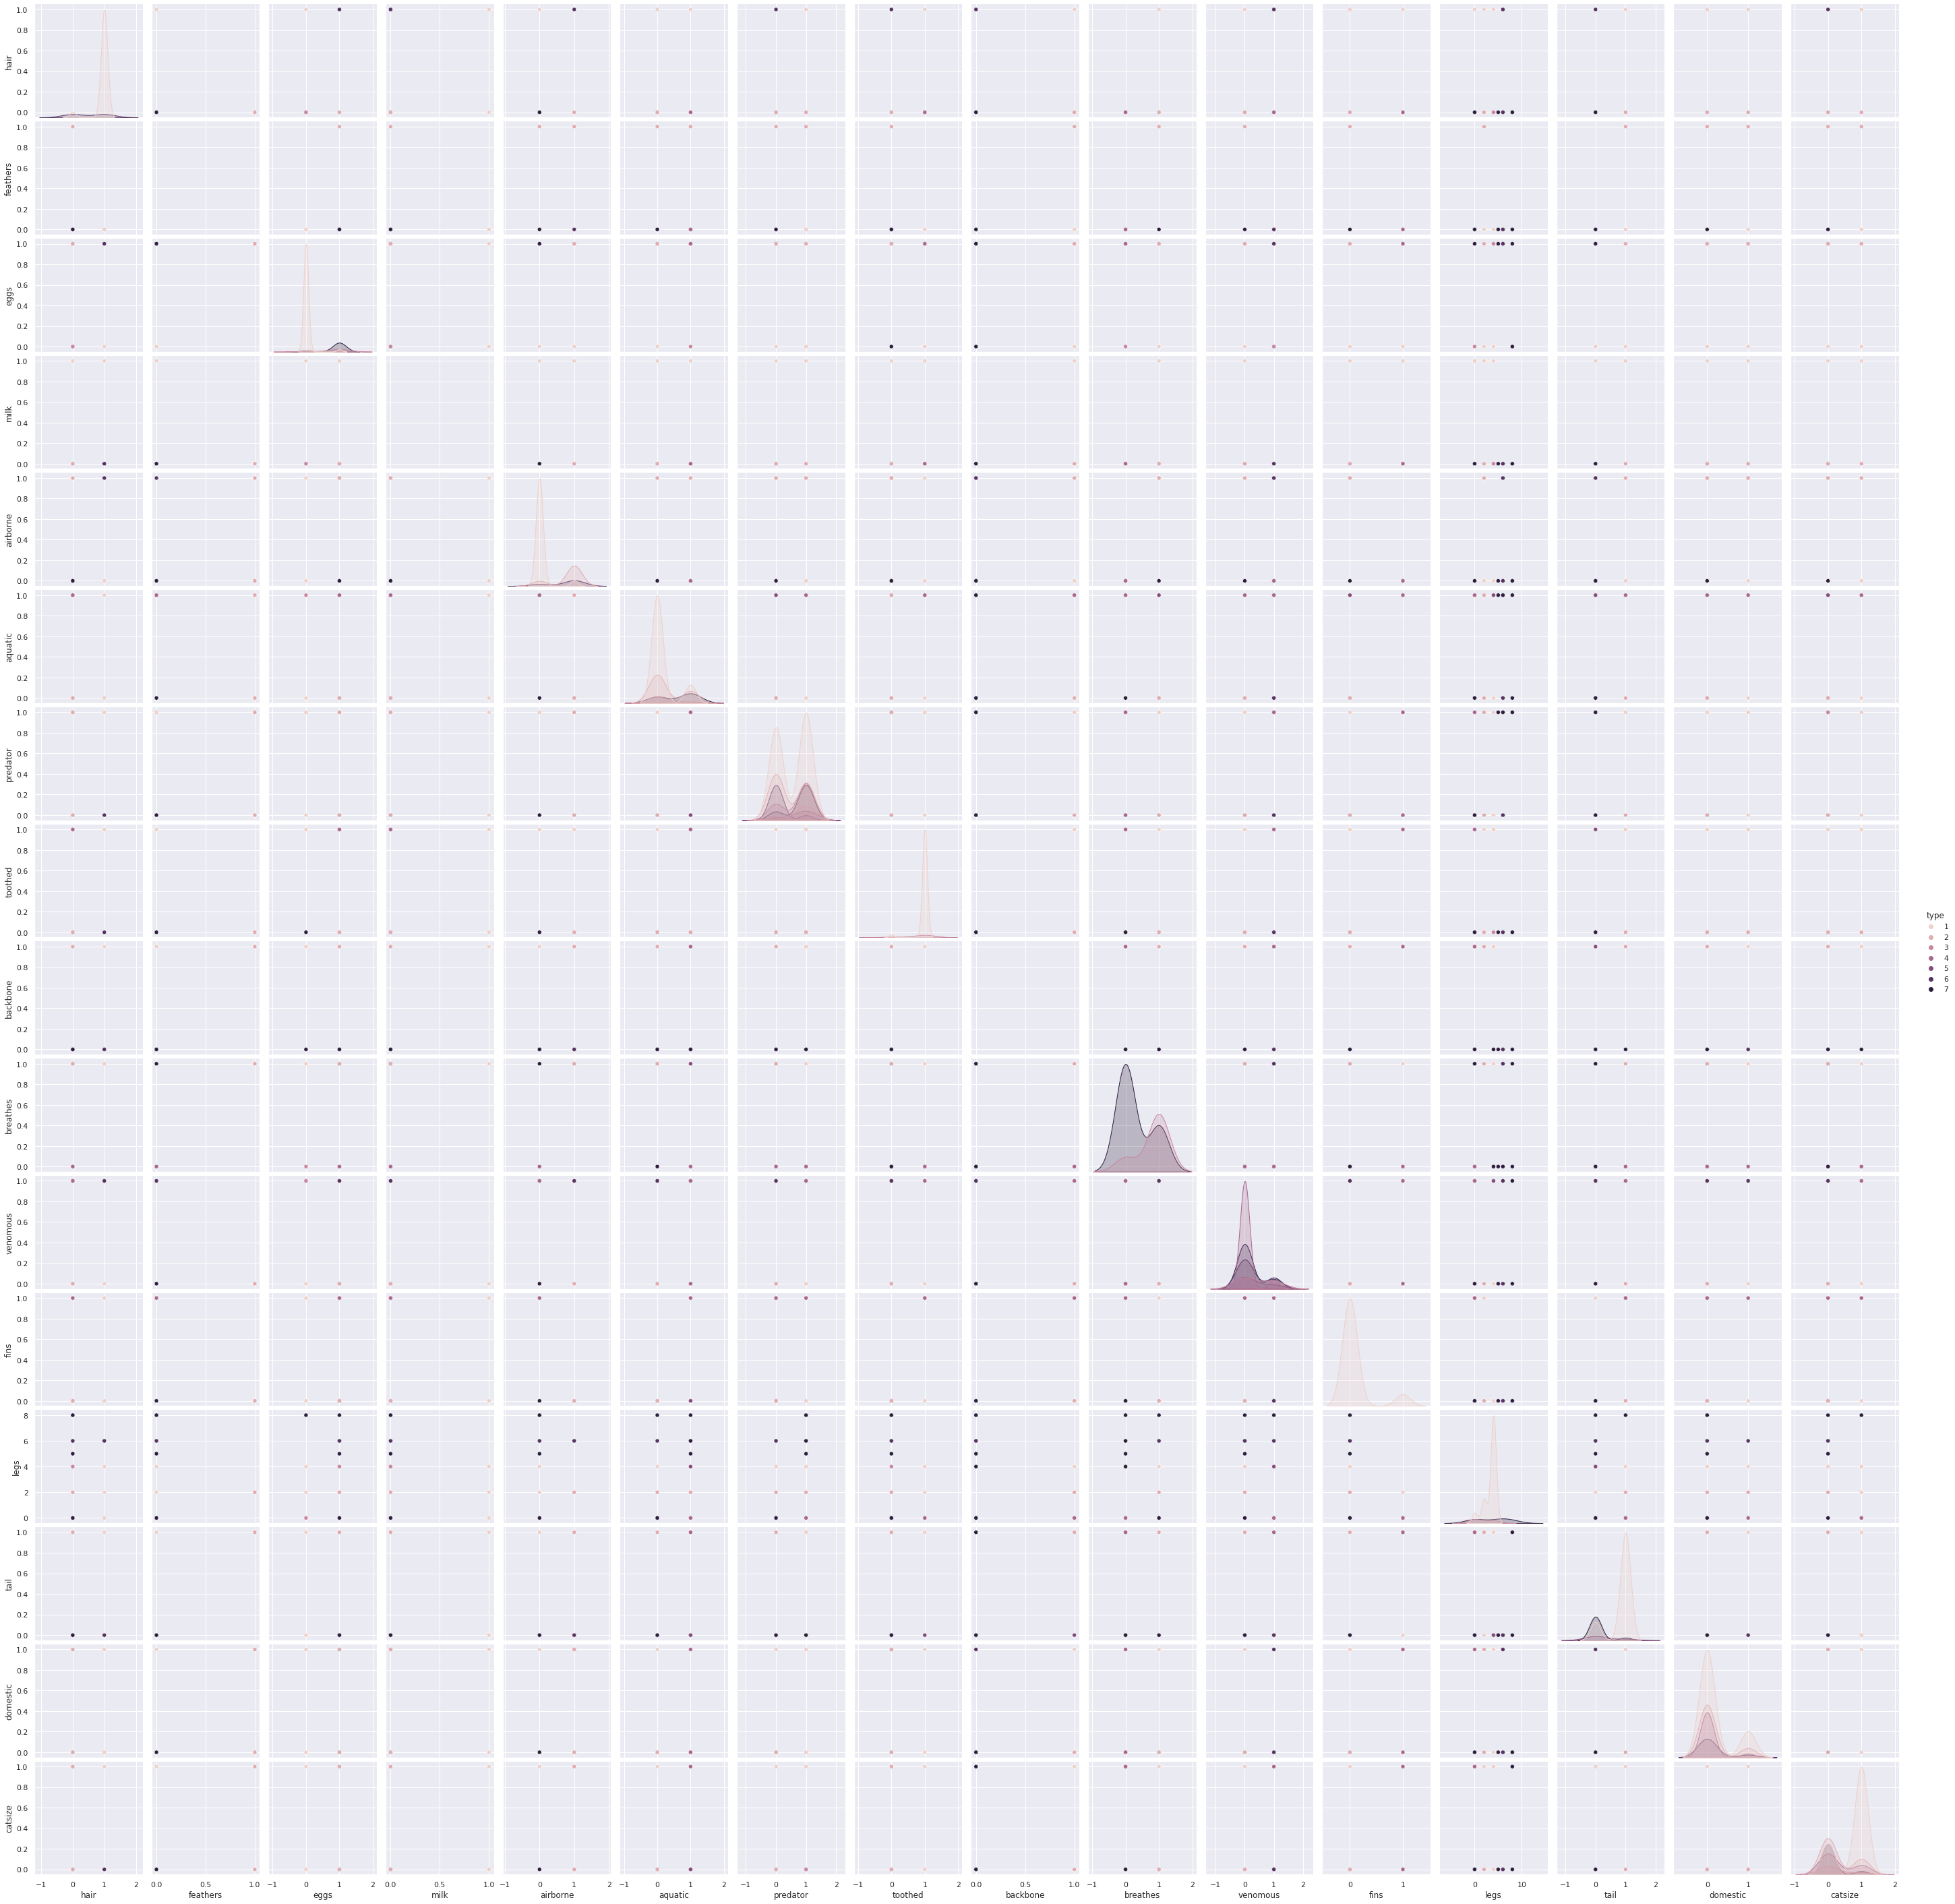

In [151]:
#pairwise plot of all the features
sns.pairplot(df,hue='type')
plt.show()

# **KNN**
> The KNN algorithm is a supervised machine learning model . It predicts a target variable using one or multiple independent variables.

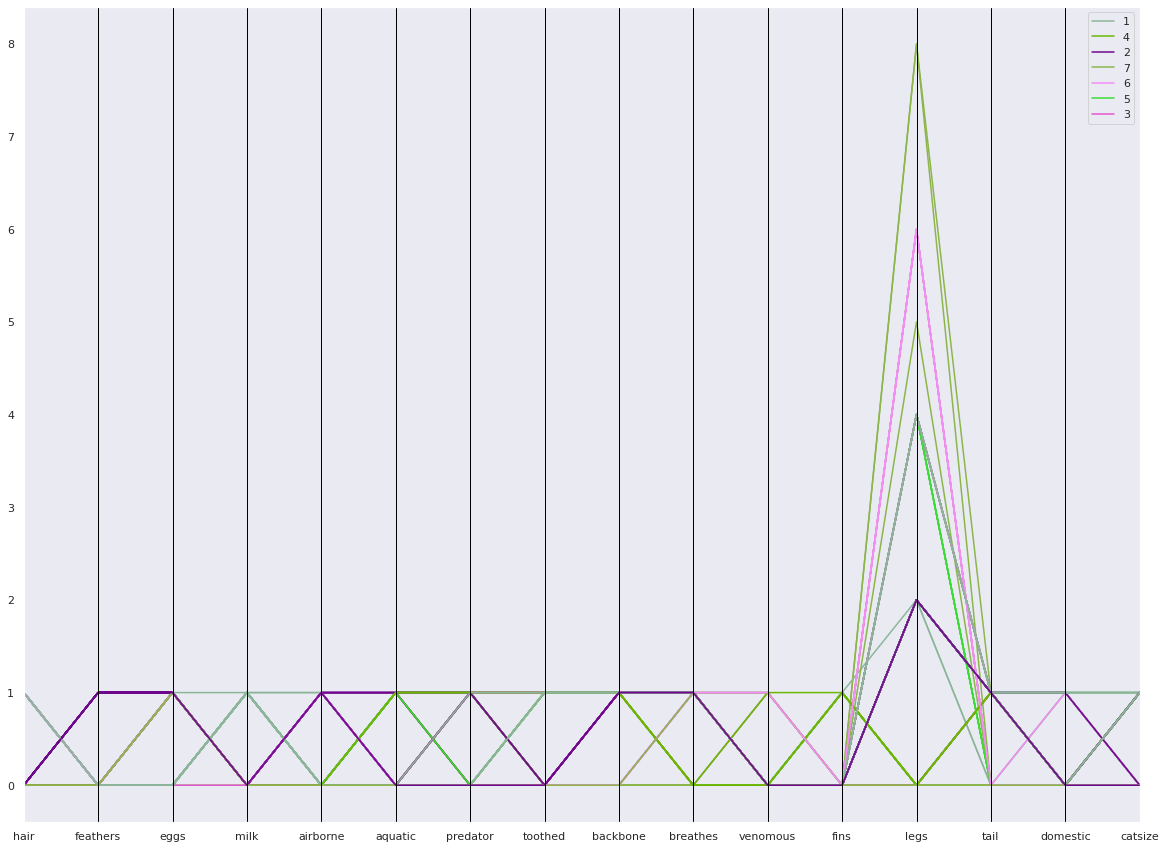

In [152]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20,15))
parallel_coordinates(df.iloc[:,1:], "type")
plt.show()

## **Explainatory and Explained Variables**

In [153]:
x  = df.iloc[: , 1:17]
y = df.iloc[ :,17]


In [154]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [155]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

Visualiztion using TSNE



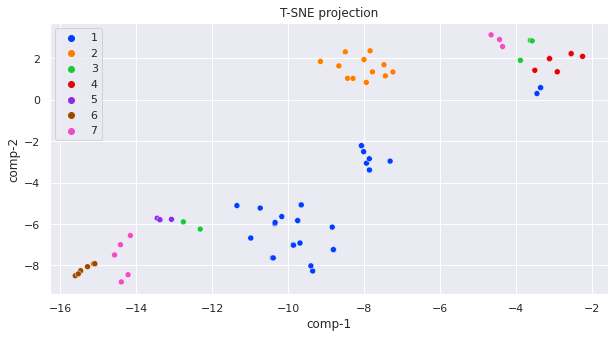

In [156]:
import sklearn
from sklearn.manifold import TSNE

print("Visualiztion using TSNE\n")
tsne = TSNE(n_components=2,random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
    
plt.figure(figsize=(10,5))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
              palette=sns.color_palette("bright", 7),
                data=df).set(title="T-SNE projection") 
plt.show()

## **Train & Test - Splitting**

In [157]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.30, random_state=4)

In [158]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 16)
(31, 16)
(70,)
(31,)


# **Different Method of Distances in K-Nearest Neighbors**
---
**1. Euclidean**

**2. manhattan**

## **Using Euclidean Distance:**

In [159]:
from sklearn.model_selection import KFold
from scipy.spatial import distance

In [160]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [161]:
k_range = list(range(1, 41))
parameters = {
    'n_neighbors': k_range,
     'weights': ['uniform', 'distance'] ,
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [162]:
model = KNeighborsClassifier(metric=distance.sqeuclidean)
grid = GridSearchCV(estimator=model, param_grid=parameters,n_jobs=-1,verbose=1, scoring="accuracy")
grid.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=KNeighborsClassifier(metric=<function sqeuclidean at 0x7f2c52f11a70>),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

* **Here , GribsearchCV suggest us a best parameter with best score, so now we build our model using this suggestions.**

In [163]:
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

0.9571428571428573 
 
 {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}


In [164]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(grid.score(x_test, y_test)))

Training set score: 0.9714
Test set score: 0.8710


> By fitting the model with GridsearchCv we came up with the overfitting issue, to overcome this issue now we plot the training and testing graph to find out best k-Neighbor value.

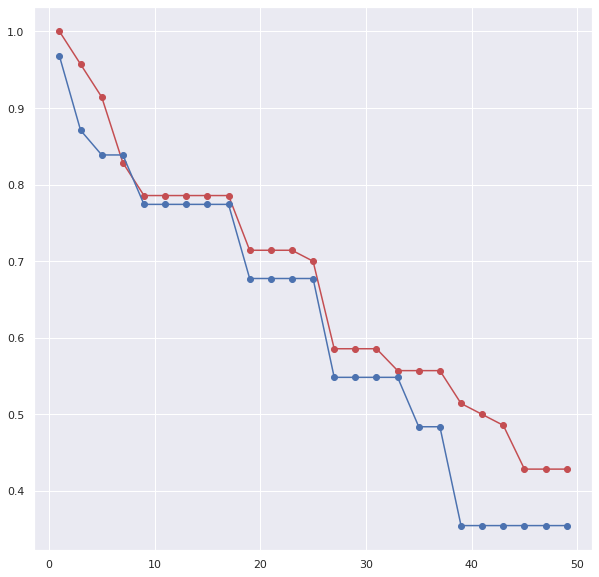

In [165]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i, metric=distance.sqeuclidean)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train)
    test_acc = np.mean(neigh.predict(x_test) == y_test)
    acc.append([train_acc, test_acc])


# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")
plt.show()

> Here,If we set K-neighbour value = 7 ,so there is neither problem of over-fitting nor under-fitting on the basis of above visualisation.

### **Model Building:**

In [166]:
#Square Euclidean

euclid_model = KNeighborsClassifier(n_neighbors=7, metric=distance.sqeuclidean) # Square Euclidean distance model
euclid_model.fit(x_train,y_train) # Train models

KNeighborsClassifier(metric=<function sqeuclidean at 0x7f2c52f11a70>,
                     n_neighbors=7)

In [167]:
print(f'euclidean distance \n\n')
for i in range(2,40):
  euclid_model = euclid_model
  cv = KFold(n_splits=i, shuffle=True, random_state=0)
  scores = cross_val_score(euclid_model, x, y, cv=cv)
  print(f'K-Fold number {i} : Accuracy {scores.mean()}')

euclidean distance 


K-Fold number 2 : Accuracy 0.7131372549019608
K-Fold number 3 : Accuracy 0.8009506833036245
K-Fold number 4 : Accuracy 0.8111538461538461
K-Fold number 5 : Accuracy 0.8404761904761905
K-Fold number 6 : Accuracy 0.8431372549019608
K-Fold number 7 : Accuracy 0.8204081632653061
K-Fold number 8 : Accuracy 0.8092948717948718
K-Fold number 9 : Accuracy 0.8106060606060606
K-Fold number 10 : Accuracy 0.8209090909090909
K-Fold number 11 : Accuracy 0.8282828282828283
K-Fold number 12 : Accuracy 0.8402777777777777
K-Fold number 13 : Accuracy 0.8447802197802198
K-Fold number 14 : Accuracy 0.8392857142857144
K-Fold number 15 : Accuracy 0.8412698412698414
K-Fold number 16 : Accuracy 0.8407738095238095
K-Fold number 17 : Accuracy 0.8431372549019608
K-Fold number 18 : Accuracy 0.8500000000000001
K-Fold number 19 : Accuracy 0.8508771929824562
K-Fold number 20 : Accuracy 0.8400000000000001
K-Fold number 21 : Accuracy 0.8571428571428571
K-Fold number 22 : Accuracy 0.8500000000000001

In [168]:
cv = KFold(n_splits=25, shuffle=True, random_state=0)
results = cross_val_score(euclid_model, x_train, y_train, cv=cv)
print(results.mean())

0.78


* **Cross validation score =  78%**





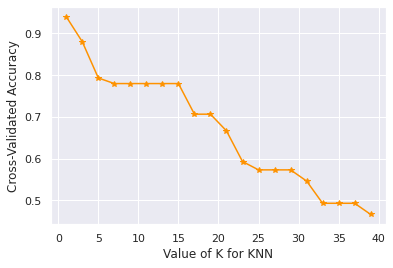

In [169]:
# Visualising k neighbors value:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41,2)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance.sqeuclidean)
    cv = KFold(n_splits=25, shuffle=True, random_state=0)
    scores = cross_val_score(knn, x_train, y_train, cv=cv)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker = '*')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [170]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(euclid_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(euclid_model.score(x_test, y_test)))

Training set score: 0.8286
Test set score: 0.8387


In [171]:
# Make predictions
euclid_predictions = euclid_model.predict(x_test) 

In [172]:
df1 = pd.DataFrame({'actual': y_test, 'euclid': euclid_predictions})
df1.head()

,actual,euclid
20,2,2
10,1,1
97,6,6
16,2,2
64,1,1


In [173]:
cm=pd.crosstab(y_test, euclid_predictions, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,1,2,4,5,6,7
Actual,,,,,,
1,10,0,1,0,0,0
2,0,7,0,0,0,0
4,0,0,4,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,3,0
7,0,0,3,1,0,1


In [174]:
print("Accuracy", accuracy_score(y_test,euclid_predictions)*100)

Accuracy 83.87096774193549


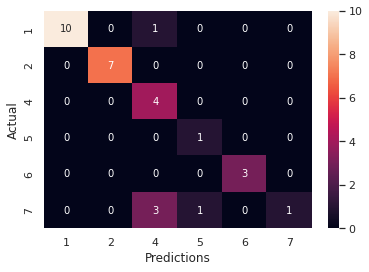

In [175]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [176]:
from sklearn.metrics import classification_report,mean_squared_error

print(classification_report(y_test, euclid_predictions))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         7
           4       0.50      1.00      0.67         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         3
           7       1.00      0.20      0.33         5

    accuracy                           0.84        31
   macro avg       0.83      0.85      0.77        31
weighted avg       0.92      0.84      0.82        31



In [177]:
# rmse and mse for train data
train_preds_grid = grid.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# rmse and mse for test data
test_preds_grid = grid.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)

print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.49280538030458115 

 test rmse = 1.2951522516054665 




In [178]:
target= ["1","2","3","5","6","7"]



# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)





 ROC AUC score: 0.9106341189674523 




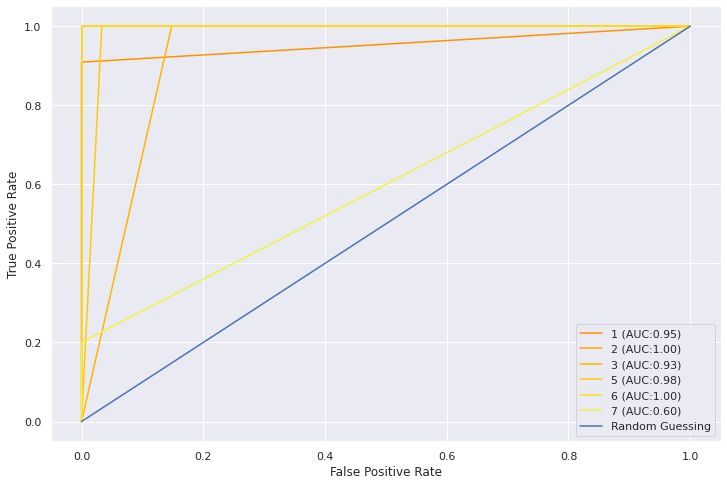

In [179]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print(f'\n\n ROC AUC score: {multiclass_roc_auc_score(y_test, euclid_predictions)} \n\n')

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

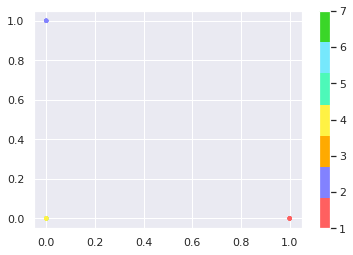

In [180]:
from matplotlib.colors import ListedColormap

# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=euclid_predictions, s=10, cmap=cm_dark)
f.colorbar(points)
plt.show()

## **Using Manhattan Distance :**

In [181]:
model = KNeighborsClassifier(metric=distance.cityblock)
grid = GridSearchCV(estimator=model, param_grid=parameters,n_jobs=-1,verbose=1, scoring="accuracy")
grid.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=KNeighborsClassifier(metric=<function cityblock at 0x7f2c52f11e60>),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [182]:
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

0.9571428571428573 
 
 {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}


In [183]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(grid.score(x_test, y_test)))

Training set score: 0.9571
Test set score: 0.9032


* **Here , GribsearchCV suggest us a best parameter with best score, so now we build our model using this suggestions.**


> By fitting the model with GridsearchCv we came up with the overfitting issue, to overcome this issue now we plot the training and testing graph to give us best k-Neighbor value.

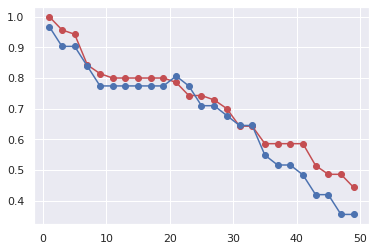

In [184]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i, metric=distance.cityblock)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train)
    test_acc = np.mean(neigh.predict(x_test) == y_test)
    acc.append([train_acc, test_acc])


# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")

> Here,If we set K-neighbour value = 7 ,so there is neither problem of over-fitting nor under-fitting on the basis of above visualisation.

### **Model Building:**

In [185]:
manhattan_model = KNeighborsClassifier(n_neighbors=7, metric=distance.cityblock,) # Manhattan distance model
manhattan_model.fit(x_train, y_train)

KNeighborsClassifier(metric=<function cityblock at 0x7f2c52f11e60>,
                     n_neighbors=7)

In [186]:
print(f'\n\n manhattan distance \n\n')
for i in range(2,40):
  manhattan_model = manhattan_model
  cv = KFold(n_splits=i, shuffle=True, random_state=0)
  scores = cross_val_score(manhattan_model, x, y, cv=cv)
  print(f'K-Fold number {i} : Accuracy {scores.mean()}')



 manhattan distance 


K-Fold number 2 : Accuracy 0.7231372549019608
K-Fold number 3 : Accuracy 0.8502673796791443
K-Fold number 4 : Accuracy 0.8503846153846153
K-Fold number 5 : Accuracy 0.8800000000000001
K-Fold number 6 : Accuracy 0.8627450980392157
K-Fold number 7 : Accuracy 0.8598639455782313
K-Fold number 8 : Accuracy 0.858173076923077
K-Fold number 9 : Accuracy 0.8594276094276094
K-Fold number 10 : Accuracy 0.8800000000000001
K-Fold number 11 : Accuracy 0.8686868686868686
K-Fold number 12 : Accuracy 0.8796296296296297
K-Fold number 13 : Accuracy 0.8846153846153846
K-Fold number 14 : Accuracy 0.8788265306122448
K-Fold number 15 : Accuracy 0.880952380952381
K-Fold number 16 : Accuracy 0.8705357142857143
K-Fold number 17 : Accuracy 0.8921568627450981
K-Fold number 18 : Accuracy 0.9092592592592593
K-Fold number 19 : Accuracy 0.9122807017543859
K-Fold number 20 : Accuracy 0.9100000000000001
K-Fold number 21 : Accuracy 0.8952380952380953
K-Fold number 22 : Accuracy 0.886363636363636

* **Here the splits for best K-Fold number with best accuracy score is 19.**

In [187]:
cv = KFold(n_splits=19, shuffle=True, random_state=0)
results = cross_val_score(manhattan_model, x_train, y_train, cv=cv)
print(results.mean())

0.7938596491228069


* **Here the splits for best K-Fold number with best accuracy score is 19.**

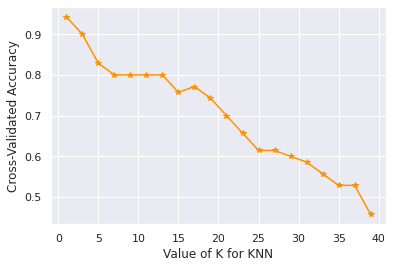

In [188]:
# Visualising k neighbors value:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41,2)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance.cityblock)
    cv = KFold(n_splits=7, shuffle=True, random_state=0)
    scores = cross_val_score(knn, x_train, y_train, cv=cv)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker = '*')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [189]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(manhattan_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(manhattan_model.score(x_test, y_test)))

Training set score: 0.8429
Test set score: 0.8387


In [190]:
# Make predictions
manhattan_predictions = manhattan_model.predict(x_test)

In [191]:
df1 = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions,})
df1.head()

,actual,manhattan
20,2,2
10,1,1
97,6,6
16,2,2
64,1,1


In [192]:
print("Accuracy", accuracy_score(y_test,manhattan_predictions)*100)

Accuracy 83.87096774193549


In [193]:
cm=pd.crosstab(y_test, manhattan_predictions, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,1,2,4,5,6,7
Actual,,,,,,
1,10,0,1,0,0,0
2,0,7,0,0,0,0
4,0,0,4,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,3,0
7,0,1,2,1,0,1


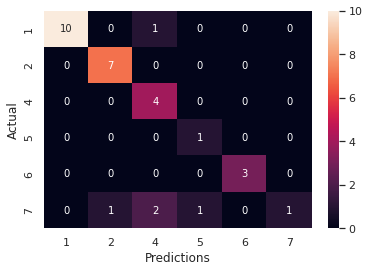

In [194]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [195]:
print(classification_report(y_test, manhattan_predictions))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.88      1.00      0.93         7
           4       0.57      1.00      0.73         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         3
           7       1.00      0.20      0.33         5

    accuracy                           0.84        31
   macro avg       0.82      0.85      0.77        31
weighted avg       0.90      0.84      0.81        31



In [196]:
# rmse and mse for train data
train_preds_grid = grid.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# rmse and mse for test data
test_preds_grid = grid.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)

print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.50709255283711 

 test rmse = 1.2443420336765103 




In [197]:
y_pred_prob = manhattan_model.predict_proba(x_test)
y_pred_prob[10]

array([0., 1., 0., 0., 0., 0., 0.])

In [198]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['1', '2','3','4','5','6','7'])

y_pred_prob_df

,1,2,3,4,5,6,7
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.285714
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.428571
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.571429
7,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000




 ROC AUC score: 0.9102483164983165 




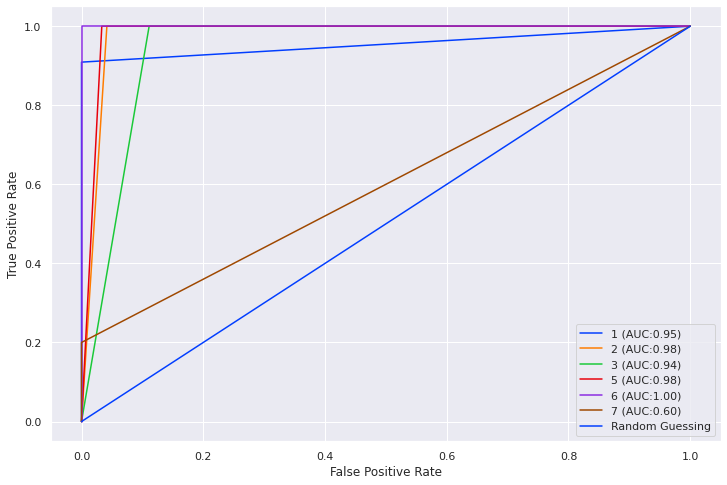

In [199]:
# ROC CURVE for Euclidean

target= ["1","2","3","5","6","7"]
sns.set( palette="bright")
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

print(f'\n\n ROC AUC score: {multiclass_roc_auc_score(y_test, manhattan_predictions)} \n\n')

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

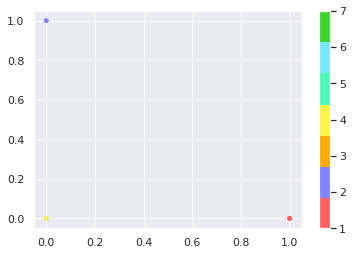

In [200]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=manhattan_predictions, s=10, cmap=cm_dark)
f.colorbar(points)
plt.show()

# **Using Over Sampling for balancing the data**.

* We will use RandomOverSampler (ROS) for sampling the the data to balance our data

In [201]:
from imblearn.over_sampling import RandomOverSampler

In [202]:
ros = RandomOverSampler(random_state = 0)

* Fitting the data using ROS

In [203]:
x_resample, y_resample = ros.fit_resample(x,y)
y_df = pd.DataFrame(y_resample)

In [204]:
y_df.value_counts()

type
1       41
2       41
3       41
4       41
5       41
6       41
7       41
dtype: int64

* **We could see the data is resampled now and all the type values are 41 now. Previously only type 1 was 41. We will split the resampled data into training and test data and build a KNN mode**

In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size = .2, random_state = 0, stratify = y_resample)

### **Using GridSearch for Algorithm Tuning after resampling**

In [206]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=parameters,n_jobs=-1,verbose=1, scoring="accuracy")
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [207]:
print(grid.best_score_ ,'\n',"\n" , grid.best_params_)

1.0 
 
 {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


* After applying GridSearch, we got the best K (n_neighbors) value as 1, so we will be using the k= 1 for KNN Classifier algorithm

In [208]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(grid.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(grid.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 1.0000


* **Here , GribsearchCV suggest us a best parameter with best score, so now we build our model using this suggestions.**


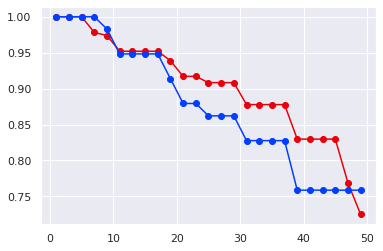

In [209]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])


# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")

> Here,If we set K-neighbour value = 1 ,so there is neither problem of over-fitting nor under-fitting on the basis of above visualisation.

> **Using KNN with k=1 for model classification**
---

* We had identified the k=1 is best parameter with GridSearch so using k as 5

## **Model Building:**

In [210]:
model = KNeighborsClassifier(n_neighbors=1) # Manhattan distance model
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [211]:
print(f'\n\n manhattan distance \n\n')
for i in range(2,40):
  model = model
  cv = KFold(n_splits=i, shuffle=True, random_state=0)
  scores = cross_val_score(model, x_resample, y_resample, cv=cv)
  print(f'K-Fold number {i} : Accuracy {scores.mean()}')



 manhattan distance 


K-Fold number 2 : Accuracy 0.9895833333333333
K-Fold number 3 : Accuracy 1.0
K-Fold number 4 : Accuracy 1.0
K-Fold number 5 : Accuracy 1.0
K-Fold number 6 : Accuracy 1.0
K-Fold number 7 : Accuracy 1.0
K-Fold number 8 : Accuracy 1.0
K-Fold number 9 : Accuracy 1.0
K-Fold number 10 : Accuracy 1.0
K-Fold number 11 : Accuracy 1.0
K-Fold number 12 : Accuracy 1.0
K-Fold number 13 : Accuracy 1.0
K-Fold number 14 : Accuracy 1.0
K-Fold number 15 : Accuracy 1.0
K-Fold number 16 : Accuracy 1.0
K-Fold number 17 : Accuracy 1.0
K-Fold number 18 : Accuracy 1.0
K-Fold number 19 : Accuracy 1.0
K-Fold number 20 : Accuracy 1.0
K-Fold number 21 : Accuracy 1.0
K-Fold number 22 : Accuracy 1.0
K-Fold number 23 : Accuracy 1.0
K-Fold number 24 : Accuracy 1.0
K-Fold number 25 : Accuracy 1.0
K-Fold number 26 : Accuracy 1.0
K-Fold number 27 : Accuracy 1.0
K-Fold number 28 : Accuracy 1.0
K-Fold number 29 : Accuracy 1.0
K-Fold number 30 : Accuracy 1.0
K-Fold number 31 : Accuracy 1.0
K-Fold n

In [212]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)
results = cross_val_score(model, X_train, Y_train, cv=cv)
print(results.mean())

1.0


* **Here the splits for best K-Fold number with best accuracy score is 3.**

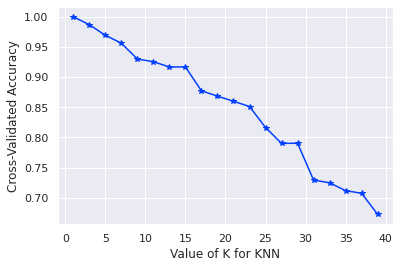

In [213]:
# Visualising k neighbors value:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41,2)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = KFold(n_splits=3, shuffle=True, random_state=0)
    scores = cross_val_score(knn, X_train, Y_train, cv=cv)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker = '*')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [214]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [215]:
# Make predictions
model_pred = model.predict(X_test)

In [216]:
df1 = pd.DataFrame({'actual': Y_test, 'model': model_pred})
df1.head()

,actual,model
270,7,7
196,5,5
137,3,3
54,1,1
165,4,4


In [217]:
print("Accuracy", accuracy_score(Y_test,model_pred)*100)

Accuracy 100.0


In [218]:
cm=pd.crosstab(Y_test, model_pred, rownames = ['Actual'], colnames= ['Predictions']) 
cm

Predictions,1,2,3,4,5,6,7
Actual,,,,,,,
1,8,0,0,0,0,0,0
2,0,8,0,0,0,0,0
3,0,0,8,0,0,0,0
4,0,0,0,8,0,0,0
5,0,0,0,0,9,0,0
6,0,0,0,0,0,9,0
7,0,0,0,0,0,0,8


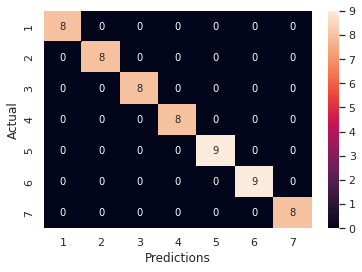

In [219]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [220]:
print(classification_report(Y_test, model_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         8

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [221]:
# rmse and mse for train data
train_preds_grid = model.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# rmse and mse for test data
test_preds_grid = model.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)

print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.0 

 test rmse = 0.0 




In [222]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[10]

array([0., 0., 0., 0., 0., 1., 0.])

In [223]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob , columns=['1', '2','3','4','5','6','7'])

y_pred_prob_df

,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0




 ROC AUC score: 1.0 




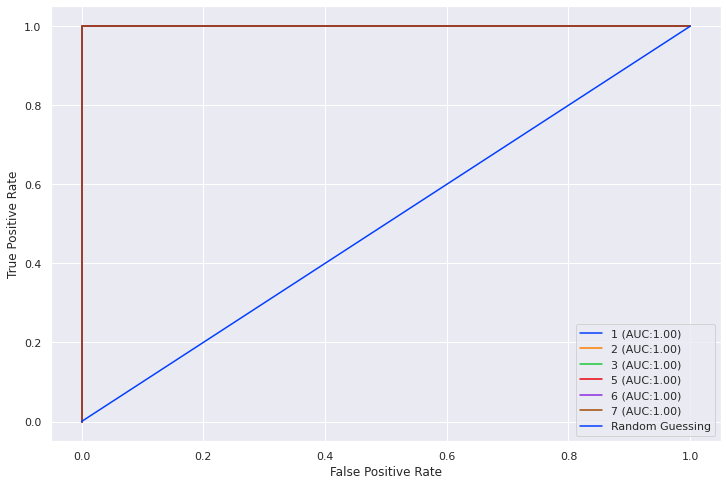

In [224]:
# ROC CURVE for Euclidean

target= ["1","2","3","5","6","7"]
sns.set( palette="bright")
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

print(f'\n\n ROC AUC score: {multiclass_roc_auc_score(Y_test, model_pred)} \n\n')

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

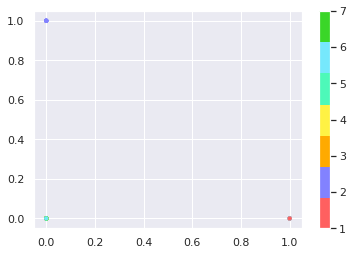

In [225]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=model_pred, s=10, cmap=cm_dark)
f.colorbar(points)
plt.show()

## **Prediction of Methods**

In [226]:
df1 = pd.DataFrame({'Actual': y_test, 'Manhattan': manhattan_predictions, 'Euclid': euclid_predictions })
df1.head()

,Actual,Manhattan,Euclid
20,2,2,2
10,1,1,1
97,6,6,6
16,2,2,2
64,1,1,1


In [227]:
df2 = pd.DataFrame({'actual': Y_test, 'Prediction': model_pred})
df2.head()

,actual,Prediction
270,7,7
196,5,5
137,3,3
54,1,1
165,4,4


## **Drawbacks of KNN:**

> The real drawback of kNN is its capacity to adapt to highly complex relationships between independent and dependent variables. kNN is less likely to perform well on advanced tasks like computer vision and natural language processing.